In [1]:
%matplotlib notebook

In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#read CSV File
zev_sales_csv = pd.read_csv("Resources/ZEV_Sales_CSV.csv").set_index('Data Year')
median_income_county = pd.read_csv('Resources/2020_Median_Income_Per_County.csv')

In [86]:
# 2020- 2023 sales
recent_zev_sales = pd.DataFrame(zev_sales_csv.loc[[2019,2020,2021,2022,2023],:])
recent_zev_sales.head()

,County,FUEL_TYPE,MAKE,MODEL,Number of Vehicles
Data Year,,,,,
2019,Alameda,Electric,Audi,e-tron,74
2019,Alameda,Electric,BMW,i3,112
2019,Alameda,Electric,Chevrolet,Bolt EV,1047
2019,Alameda,Electric,FIAT,500e,31
2019,Alameda,Electric,Ford,Focus,2


In [111]:
zev_sales_csv_county = pd.DataFrame(recent_zev_sales.groupby("County")["Number of Vehicles"].sum().sort_values(ascending=False))
print(zev_sales_csv_county.head(13))
print(zev_sales_csv_county.tail(15))

                Number of Vehicles
County                            
Los Angeles                 276524
Orange                      128893
Santa Clara                  99703
San Diego                    85388
Alameda                      65017
Riverside                    41204
San Mateo                    40646
Contra Costa                 37788
San Bernardino               32175
San Francisco                26252
Sacramento                   24929
Ventura                      21122
Marin                        13437
           Number of Vehicles
County                       
Amador                    263
Tehama                    228
Siskiyou                  141
Mono                      129
Inyo                      125
Mariposa                  108
Glenn                      99
Plumas                     84
Del Norte                  62
Colusa                     60
Trinity                    38
Lassen                     33
Alpine                     29
Sierra                   

In [80]:
zev_sales_csv_large = pd.DataFrame(zev_sales_csv_county[zev_sales_csv_county['Number of Vehicles']> 20000]).dropna(how='all')
zev_sales_csv_large

,Number of Vehicles
County,
Los Angeles,276524
Orange,128893
Santa Clara,99703
San Diego,85388
Alameda,65017
Riverside,41204
San Mateo,40646
Contra Costa,37788
San Bernardino,32175


In [81]:
zev_sales_csv_small = zev_sales_csv_county[zev_sales_csv_county['Number of Vehicles']< 20000].dropna(how='all')
Other = zev_sales_csv_small.sum()
Other

Number of Vehicles    132955
dtype: int64

In [82]:
Other_df = pd.DataFrame({'Number of Vehicles':132955},index=['Other'])
Other_df.index.rename('County', inplace=True)
Other_df

,Number of Vehicles
County,
Other,132955


In [83]:
zev_sales_chart_data = pd.concat([zev_sales_csv_large,Other_df])
zev_sales_chart_data

,Number of Vehicles
County,
Los Angeles,276524
Orange,128893
Santa Clara,99703
San Diego,85388
Alameda,65017
Riverside,41204
San Mateo,40646
Contra Costa,37788
San Bernardino,32175


In [84]:
 [ c for c in zev_sales_csv_county.index if  > 7000) else "Too Small"]

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2645162552.py, line 1)

In [94]:
fav_model_per_county = pd.DataFrame(recent_zev_sales.groupby(["MAKE","MODEL","FUEL_TYPE",'County'])["Number of Vehicles"].sum().sort_values(ascending=False).reset_index().set_index('County'))
print(fav_model_per_county.head(10))
print(fav_model_per_county.tail(5))

              MAKE    MODEL FUEL_TYPE  Number of Vehicles
County                                                   
Los Angeles  Tesla  Model 3  Electric               78629
Los Angeles  Tesla  Model Y  Electric               53644
Orange       Tesla  Model 3  Electric               35140
Santa Clara  Tesla  Model 3  Electric               30353
Orange       Tesla  Model Y  Electric               29122
San Diego    Tesla  Model 3  Electric               24362
Santa Clara  Tesla  Model Y  Electric               22081
Alameda      Tesla  Model 3  Electric               18156
San Diego    Tesla  Model Y  Electric               16926
Alameda      Tesla  Model Y  Electric               14752
                   MAKE              MODEL FUEL_TYPE  Number of Vehicles
County                                                                  
Shasta              BMW           5 Series      PHEV                   1
Monterey          Honda  Clarity Fuel Cell  Hydrogen                   1
Napa        

In [113]:
print(fav_model_per_county.loc[(fav_model_per_county.index == 'Los Angeles'),:].head(3))
print(fav_model_per_county.loc[(fav_model_per_county.index == 'Orange'),:].head(3))
print(fav_model_per_county.loc[(fav_model_per_county.index == 'San Diego'),:].head(3))
print(fav_model_per_county.loc[(fav_model_per_county.index == 'Alameda'),:].head(3))
print(fav_model_per_county.loc[(fav_model_per_county.index == 'Riverside'),:].head(3))
print(fav_model_per_county.loc[(fav_model_per_county.index == 'San Mateo'),:].head(3))
print(fav_model_per_county.loc[(fav_model_per_county.index == 'Contra Costa'),:].head(3))
print(fav_model_per_county.loc[(fav_model_per_county.index == 'San Benardino'),:].head(3))
print(fav_model_per_county.loc[(fav_model_per_county.index == 'San Francisco'),:].head(3))
print(fav_model_per_county.loc[(fav_model_per_county.index == 'Sacramento'),:].head(3))
print(fav_model_per_county.loc[(fav_model_per_county.index == 'Ventura'),:].head(3))

print(fav_model_per_county.loc[(fav_model_per_county.index == 'Trinity'),:].head(3))
print(fav_model_per_county.loc[(fav_model_per_county.index == 'Lassen'),:].head(3))
print(fav_model_per_county.loc[(fav_model_per_county.index == 'Alpine'),:].head(3))
print(fav_model_per_county.loc[(fav_model_per_county.index == 'Sierra'),:].head(3))
print(fav_model_per_county.loc[(fav_model_per_county.index == 'Modoc'),:].head(3))


               MAKE        MODEL FUEL_TYPE  Number of Vehicles
County                                                        
Los Angeles   Tesla      Model 3  Electric               78629
Los Angeles   Tesla      Model Y  Electric               53644
Los Angeles  Toyota  Prius Prime      PHEV               12413
         MAKE    MODEL FUEL_TYPE  Number of Vehicles
County                                              
Orange  Tesla  Model 3  Electric               35140
Orange  Tesla  Model Y  Electric               29122
Orange  Tesla  Model X  Electric                5548
             MAKE        MODEL FUEL_TYPE  Number of Vehicles
County                                                      
San Diego   Tesla      Model 3  Electric               24362
San Diego   Tesla      Model Y  Electric               16926
San Diego  Toyota  Prius Prime      PHEV                3103
              MAKE    MODEL FUEL_TYPE  Number of Vehicles
County                                                   

In [65]:
zev_sales_csv_county = pd.DataFrame(recent_zev_sales.groupby(["County","FUEL_TYPE"])["Number of Vehicles"].sum().sort_values(ascending=False).reset_index().set_index("County"))
print(zev_sales_csv_county.head(20))
print(zev_sales_csv_county.tail(5))

               FUEL_TYPE  Number of Vehicles
County                                      
Los Angeles     Electric              181754
Orange          Electric               86450
Santa Clara     Electric               65979
San Diego       Electric               58821
Los Angeles         PHEV               53951
Alameda         Electric               43325
San Mateo       Electric               29231
Riverside       Electric               28228
Contra Costa    Electric               25602
Orange              PHEV               21676
San Bernardino  Electric               21651
San Francisco   Electric               17518
Sacramento      Electric               17137
San Diego           PHEV               15084
Ventura         Electric               14467
Santa Clara         PHEV               12921
Alameda             PHEV                9445
San Joaquin     Electric                8919
Marin           Electric                8749
Riverside           PHEV                8063
         F

<IPython.core.display.Javascript object>


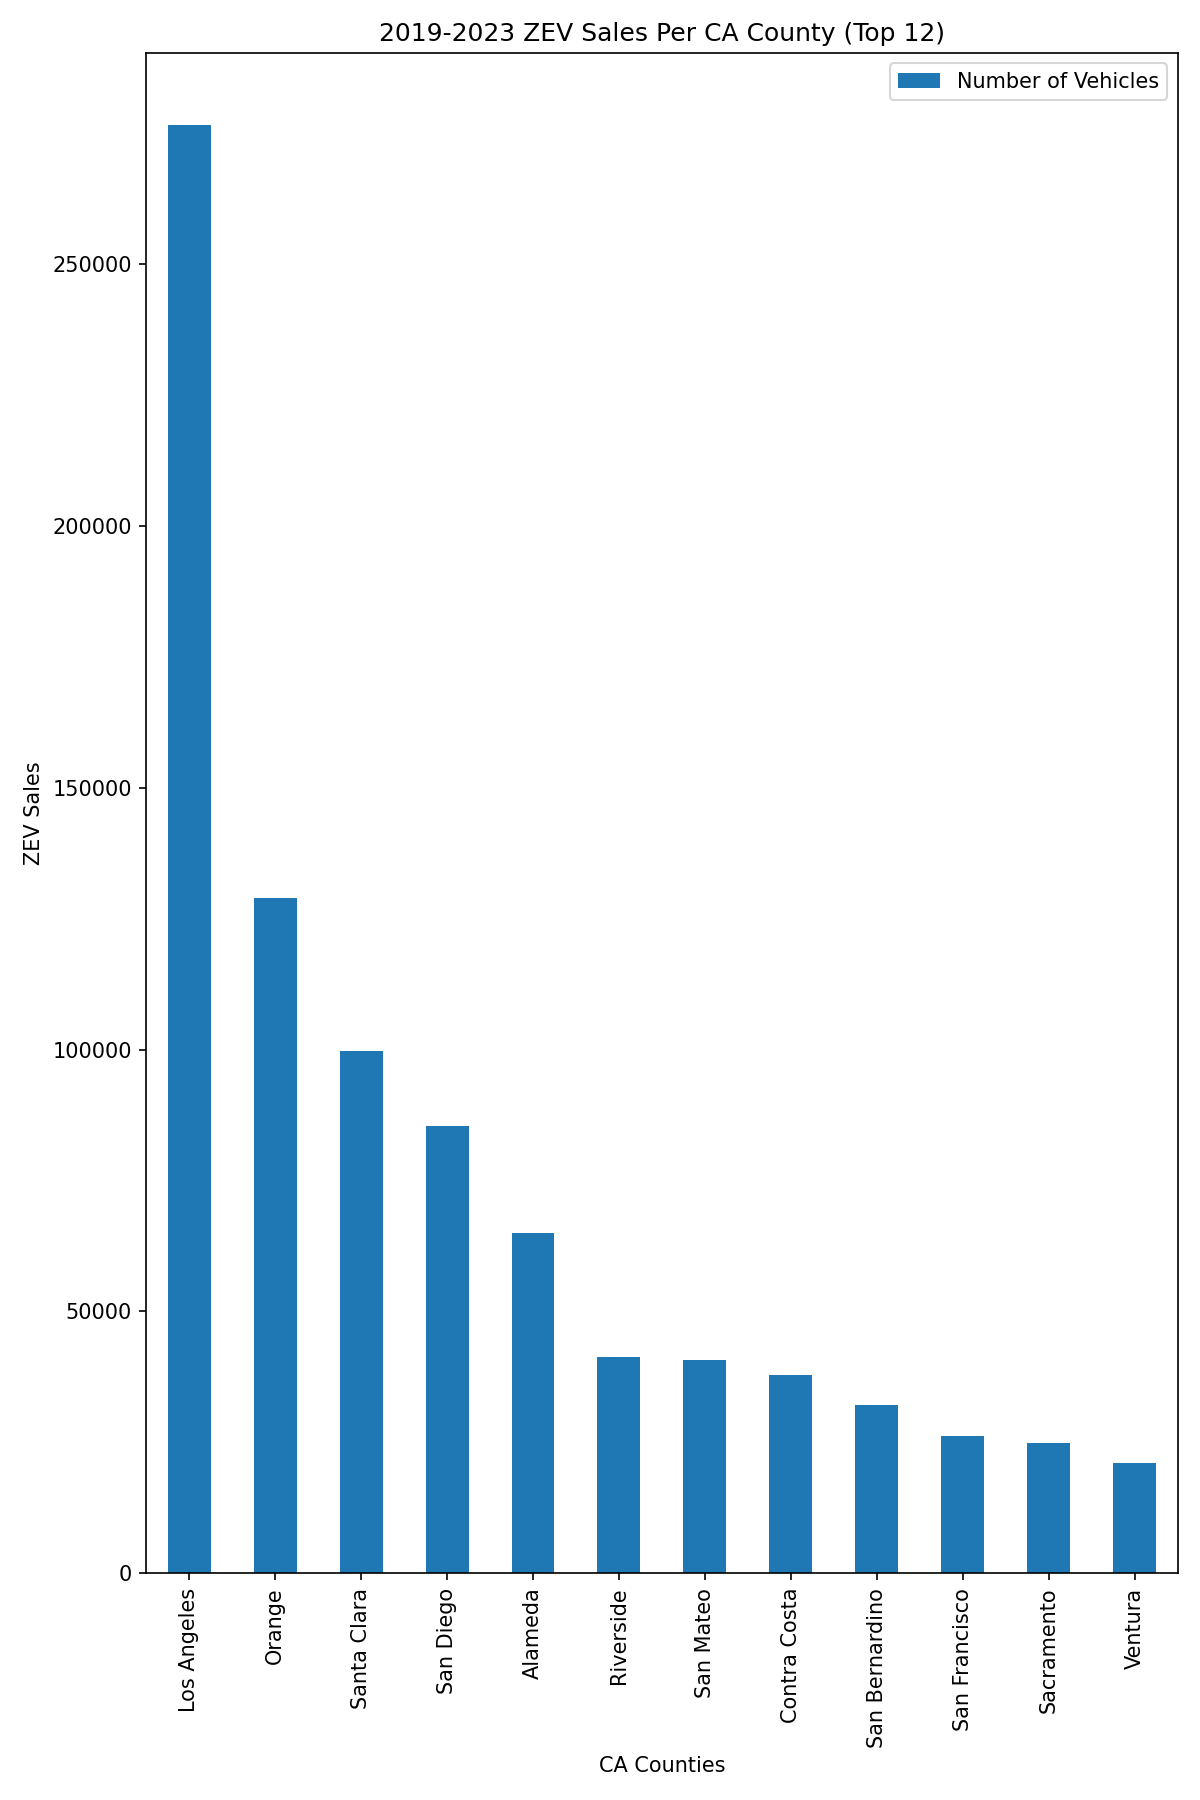

In [51]:
# Create a bar chart based off 2019-2023 Sales
zev_sales_csv_large.plot(kind="bar",figsize=(8,12))

# Set the xlabel and ylabel 
plt.xlabel("CA Counties")
plt.ylabel("ZEV Sales")
plt.title("2019-2023 ZEV Sales Per CA County (Top 12)")

#Show Graph
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


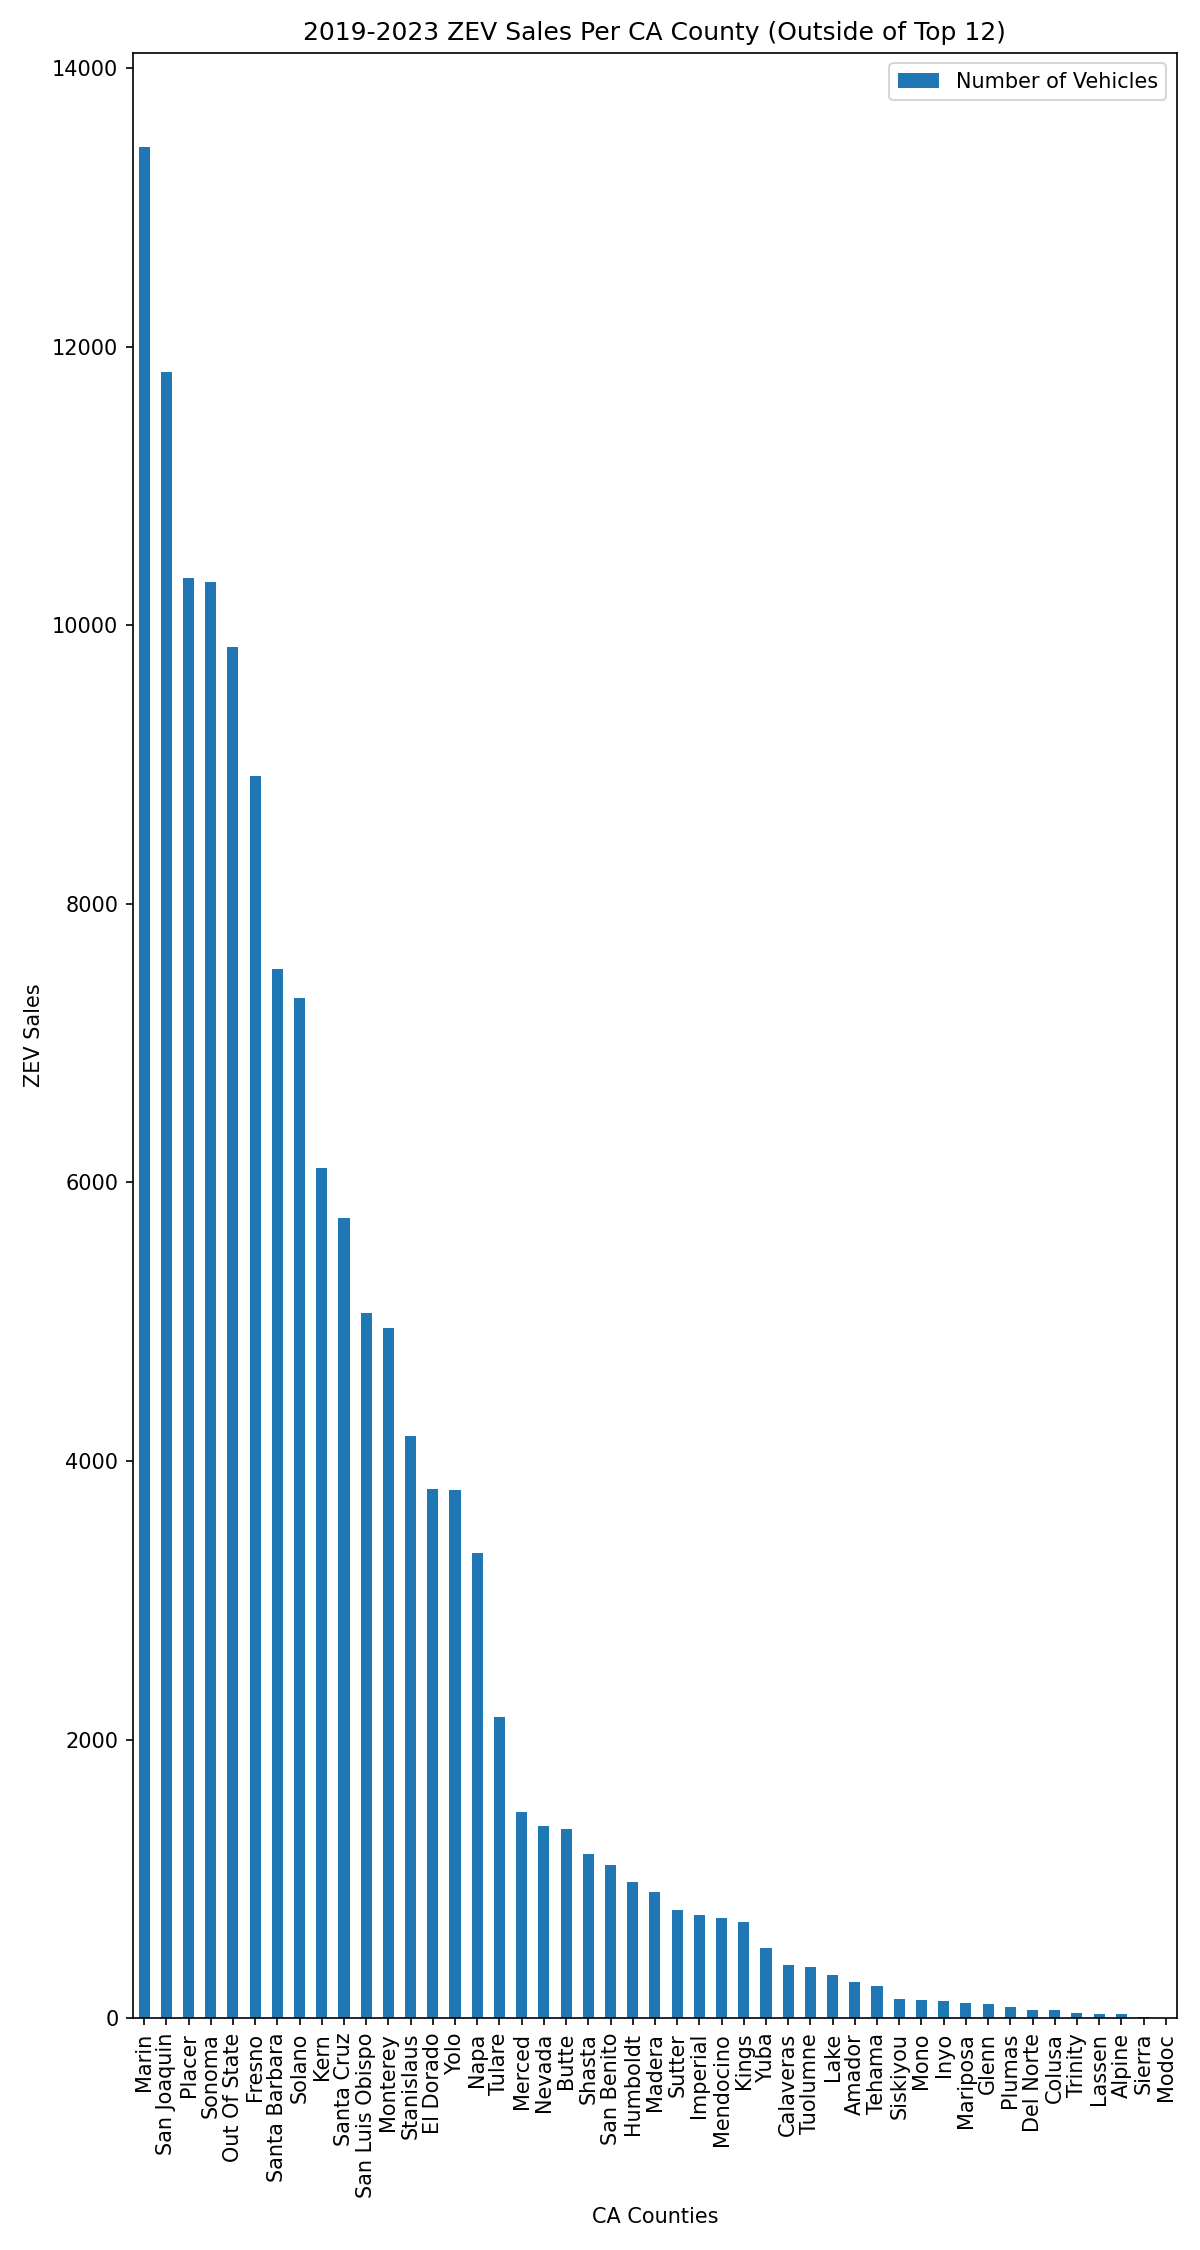

In [50]:
# Create a bar chart based off 2019-2023 Sales
zev_sales_csv_small.plot(kind="bar",figsize=(8,15))

# Set the xlabel and ylabel 
plt.xlabel("CA Counties")
plt.ylabel("ZEV Sales")
plt.title("2019-2023 ZEV Sales Per CA County (Outside of Top 12)")

#Show Graph
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


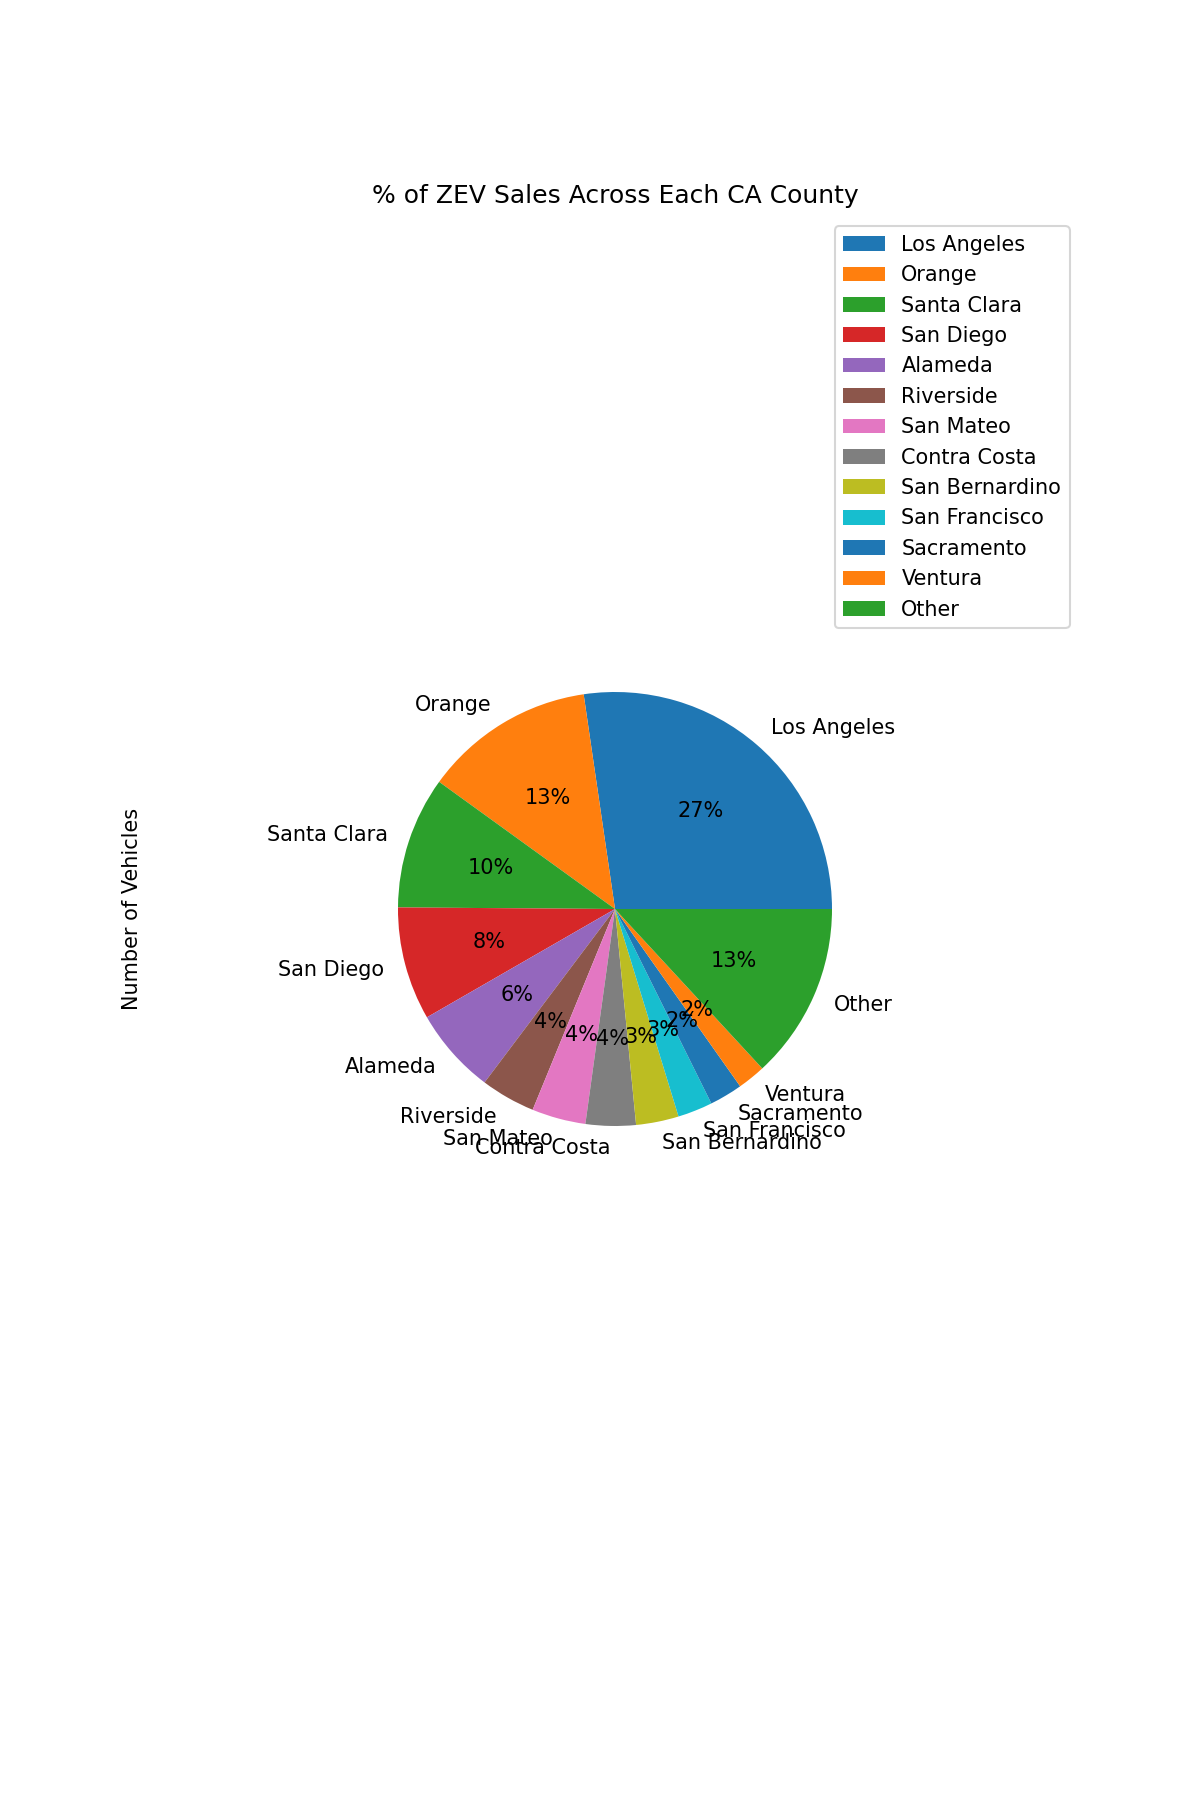

<Axes: title={'center': '% of ZEV Sales Across Each CA County'}, ylabel='Number of Vehicles'>

In [46]:
# Create a bar chart based off 2019-2023 Sales
plot = zev_sales_chart_data.plot.pie(y="Number of Vehicles",figsize=(8,12), autopct='%1.0f%%',
                                     title = '% of ZEV Sales Across Each CA County',legend='best')
plt.axis("equal")
plot

In [16]:
median_income_county = median_income_county.dropna(how='any').rename(columns={'Unnamed: 1':"County",'Unnamed: 2':"Median Income"}).sort_values("Median Income",ascending=False)
print(median_income_county.head(5))
print(median_income_county.tail(5))

   TABLE B-6.1           County Median Income
8            1      Santa Clara       $69,431
9            2            Marin       $67,925
10           3        San Mateo       $67,870
11           4    San Francisco       $66,004
12           5          Alameda       $59,976
   TABLE B-6.1      County Median Income
61          54      Madera       $31,609
62          55        Kern       $31,594
63          56      Alpine       $31,360
64          57      Tulare       $30,151
65          58    Imperial       $25,451
